## Import library

In [82]:
# import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [83]:
# https://www.kaggle.com/datasets/i2i2i2/cities-of-the-world/code

## Read data from file

In [84]:
# Đọc data từ file (phải encoding vì data không có dạng UTF-8)
df = pd.read_csv('cities15000.csv', encoding='latin1')

# In ra các dòng đầu tiên của data
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,NaN,8,NaN,NaN,NaN,15853,NaN,1033.0,Europe/Andorra,10/15/08
1,3041563,Andorra la Vella,Andorra la Vella,"ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...",42.50779,1.52109,P,PPLC,AD,NaN,7,NaN,NaN,NaN,20430,NaN,1037.0,Europe/Andorra,5/30/10
2,290594,Umm al Qaywayn,Umm al Qaywayn,"Oumm al Qaiwain,Oumm al QaÌøwaÌøn,Um al Kawain...",25.56473,55.55517,P,PPLA,AE,NaN,7,NaN,NaN,NaN,44411,NaN,2.0,Asia/Dubai,10/7/14
3,291074,Ras al-Khaimah,Ras al-Khaimah,"Julfa,Khaimah,RKT,Ra's al Khaymah,Ra's al-Chai...",25.78953,55.9432,P,PPLA,AE,NaN,5,NaN,NaN,NaN,115949,NaN,2.0,Asia/Dubai,12/5/15
4,291696,Khawr Fakkn,Khawr Fakkan,"Fakkan,Fakkn,Khawr Fakkan,Khawr Fakkn,Khaw...",25.33132,56.34199,P,PPL,AE,NaN,6,NaN,NaN,NaN,33575,NaN,20.0,Asia/Dubai,10/25/13


In [85]:
# In data types của các feature
df.dtypes

geonameid             object
name                  object
asciiname             object
alternatenames        object
latitude              object
longitude             object
feature class         object
feature code          object
country code          object
cc2                   object
admin1 code           object
admin2 code           object
admin3 code           object
admin4 code           object
population            object
elevation             object
dem                  float64
timezone              object
modification date     object
dtype: object

In [86]:
# Vì trong data này chứa nhiều dữ liêu numeric nhưng đang ở dạng object 
# nên ta phải chuyển các feature này về numeric trước khi tiếp tục

numeric_columns = ['latitude',
           'longitude', 
           'population',
           'elevation',
           'dem']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.dtypes

geonameid             object
name                  object
asciiname             object
alternatenames        object
latitude             float64
longitude            float64
feature class         object
feature code          object
country code          object
cc2                   object
admin1 code           object
admin2 code           object
admin3 code           object
admin4 code           object
population           float64
elevation            float64
dem                  float64
timezone              object
modification date     object
dtype: object

## Fill missing value

In [87]:
# Thể hiện số lượng bị miss của từng feature
print(df.isnull().sum())

geonameid                1
name                     0
asciiname                0
alternatenames        2009
latitude                 3
longitude                3
feature class            3
feature code             2
country code            15
cc2                  23231
admin1 code             10
admin2 code           7198
admin3 code          16351
admin4 code          21244
population               3
elevation            19670
dem                      3
timezone                 3
modification date        3
dtype: int64


Drop dòng chứa geonameid null

In [88]:
df = df.dropna(subset=['geonameid'])

In [89]:
def draw_hist_numeric(pre_data, data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(pre_data, bins=30, color='orange', edgecolor='black')
    axes[0].set_title(f"Original {feature_name}")
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel("Frequency")
    axes[0].grid(True, linestyle='--', alpha=0.5)

    axes[1].hist(data, bins=30, color='blue', edgecolor='black')
    axes[1].set_title(f"Processed {feature_name}")
    axes[1].set_xlabel(feature_name)
    axes[1].set_ylabel("Frequency")
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [90]:
def draw_hist_str(pre_data, data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    pre_counts = pre_data.value_counts().sort_values()
    data_counts = data.value_counts().reindex(pre_counts.index, fill_value=0)

    axes[0].bar(pre_counts.index, pre_counts.values, color='orange')
    axes[0].set_title(f"Original {feature_name}")
    axes[0].set_xlabel(feature_name)
    axes[0].set_xticklabels([])
    axes[0].grid(True, linestyle='--', alpha=0.4)
    axes[0].tick_params(axis='y', labelsize=9)

    axes[1].bar(data_counts.index, data_counts.values, color='blue')
    axes[1].set_title(f"Processed {feature_name}")
    axes[1].set_xlabel(feature_name)
    axes[1].set_xticklabels([])
    axes[1].grid(True, linestyle='--', alpha=0.4)
    axes[1].tick_params(axis='y', labelsize=9)

    plt.tight_layout()
    plt.show()

Chuyển các missing values ở các cột latitude, longitude, population, elevation và dem về trung bình

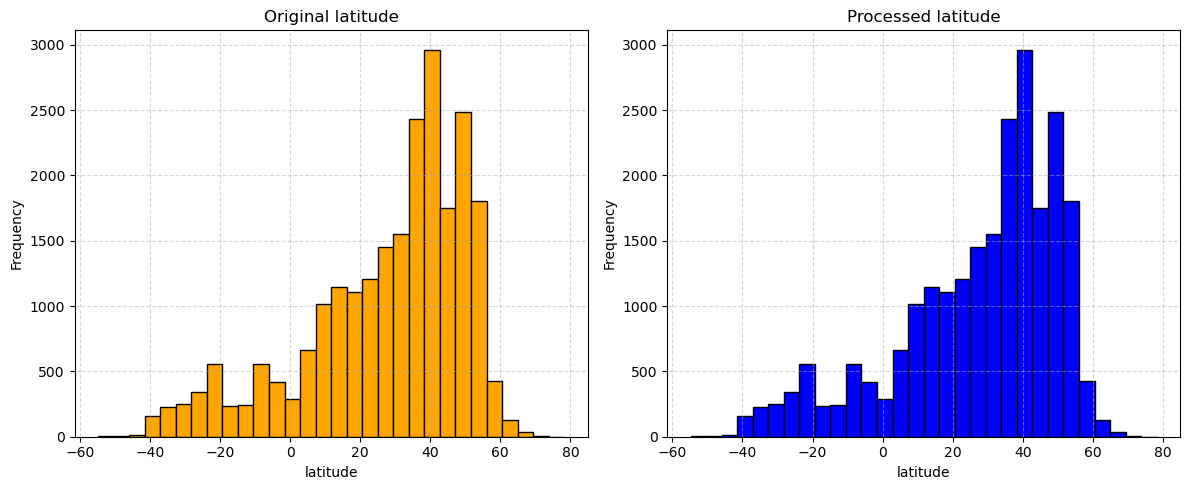

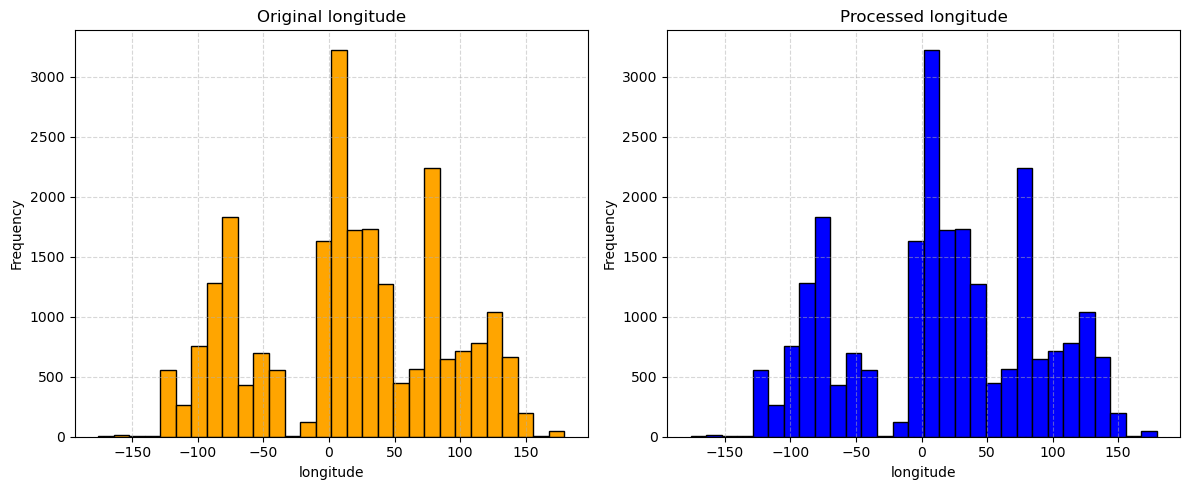

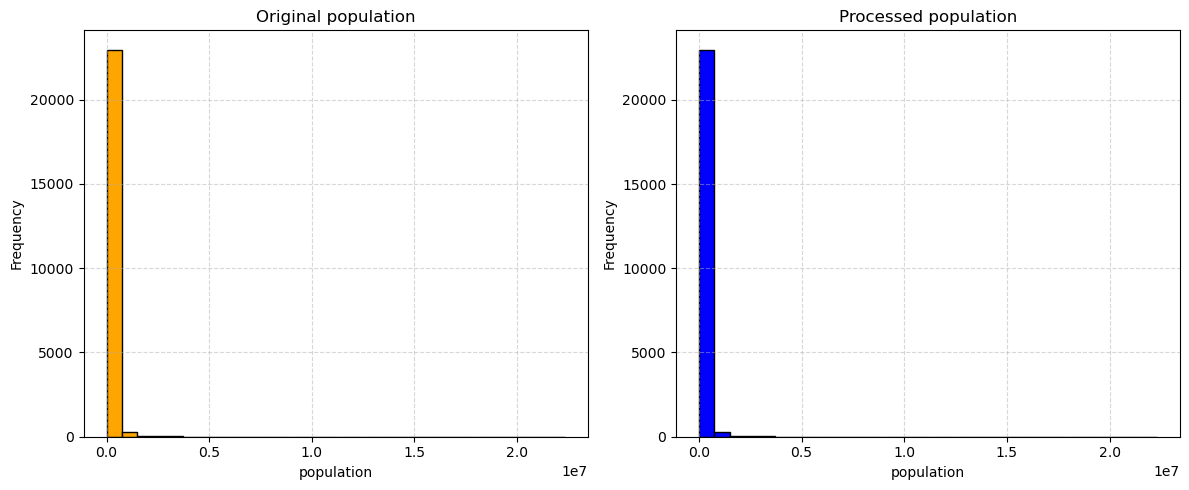

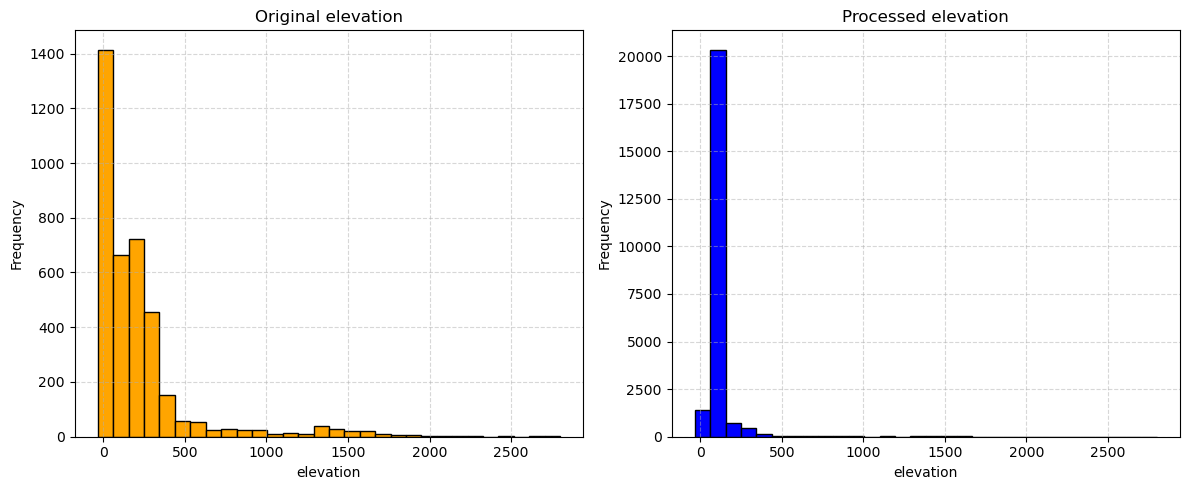

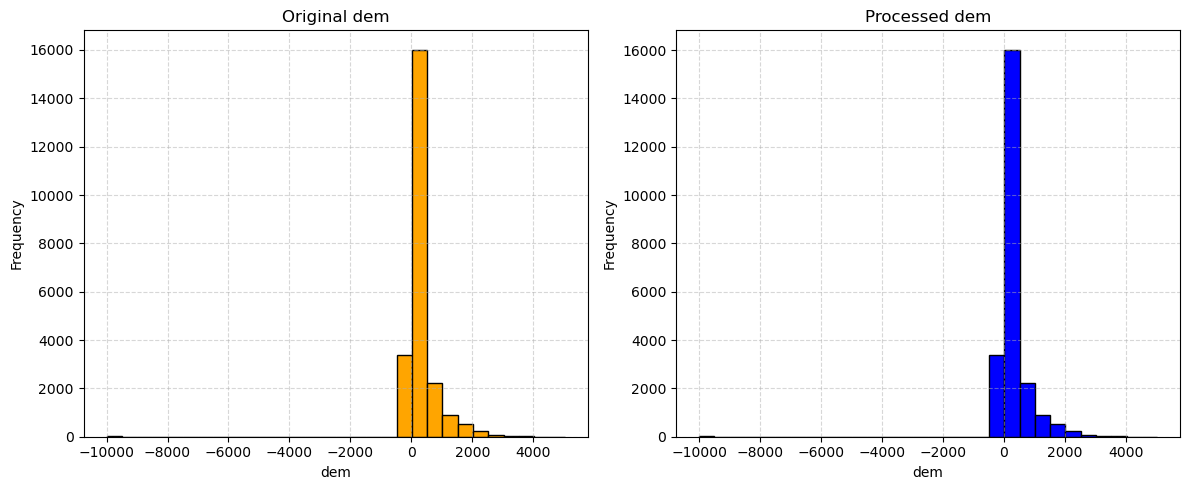

In [91]:
median_columns = [
    'latitude',
    'longitude',
    'population',
    'elevation',
    'dem'
]

for column in median_columns:
    pre_data = df[column].copy()
    
    med = df[column].median()
    df[column] = df[column].fillna(med)
    
    draw_hist_numeric(pre_data, df[column], column)

Fill các missing values ở các cột: feature class, feature code, country code, timezone với mode của cột đó

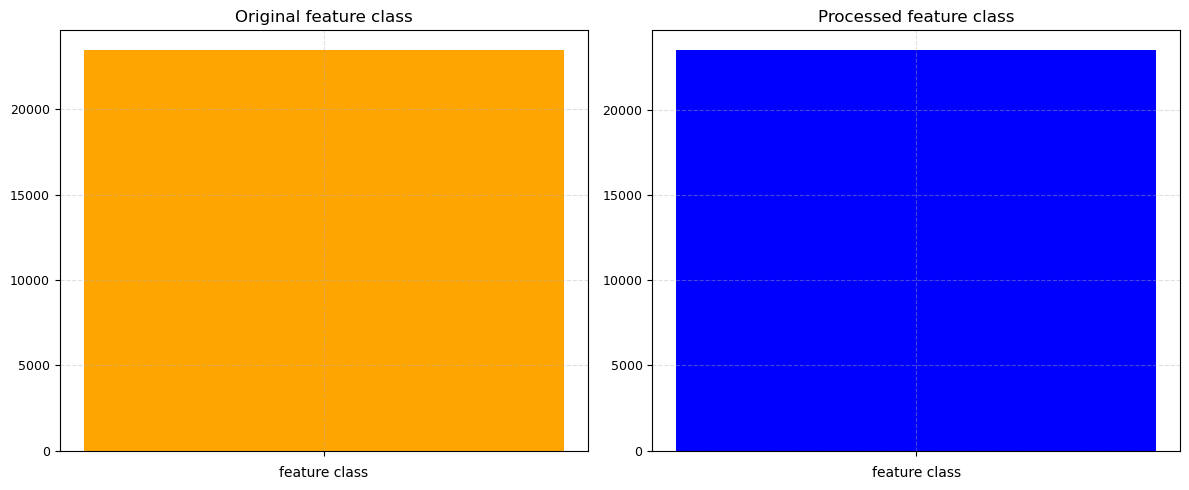

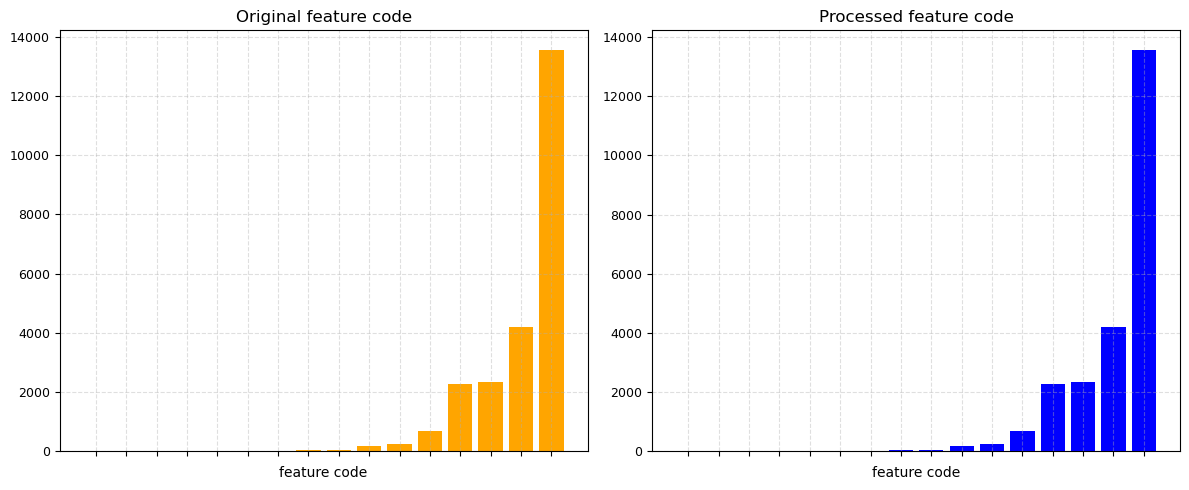

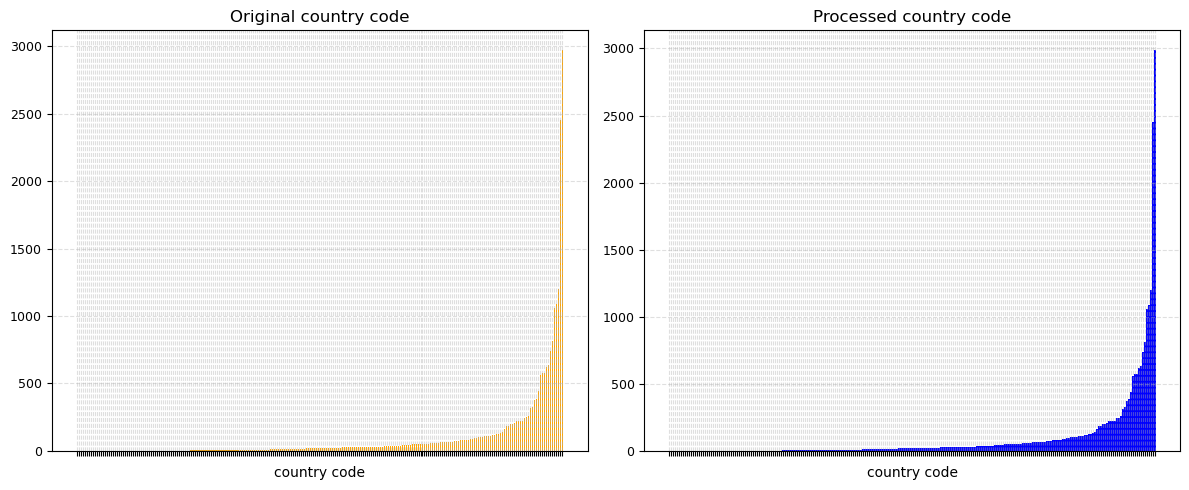

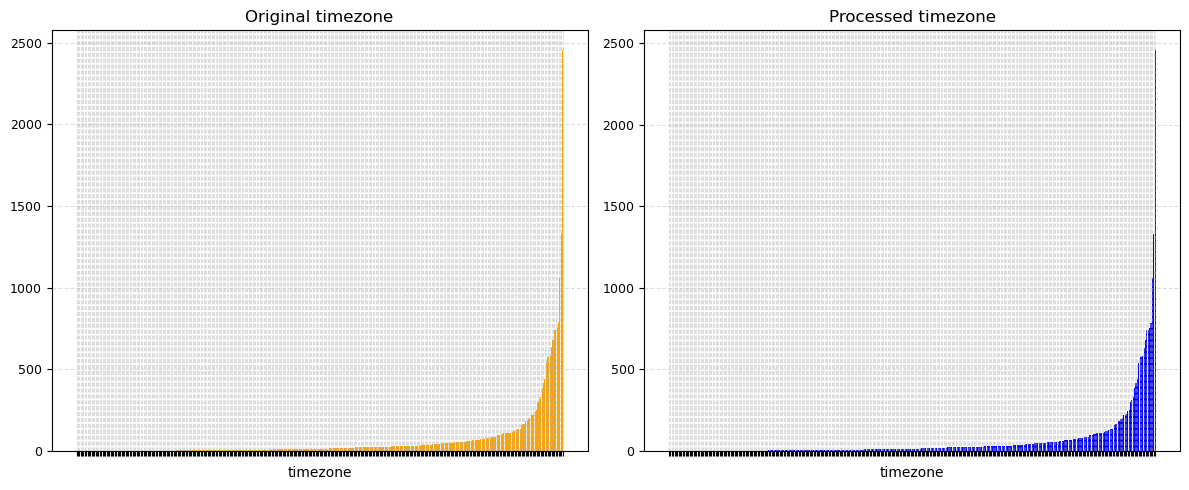

In [92]:
mode_columns = [
    'feature class',
    'feature code',
    'country code',
    'timezone'
]

for column in mode_columns:
    pre_data = df[column].copy()
    
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    
    draw_hist_str(pre_data, df[column], column)

Ở các cột mang value unique, ta thay thế giá trị ở các cột này bằng unknown

In [93]:
unique_columns = [
    'alternatenames',
    'admin1 code',
    'admin2 code',
    'admin3 code',
    'admin4 code',
    'cc2',
    'modification date'
]

for column in unique_columns:
    
    df[column] = df[column].fillna('Unknown')

In lại cac value bi trong cua moi cot

In [94]:
print(df.isnull().sum())

geonameid            0
name                 0
asciiname            0
alternatenames       0
latitude             0
longitude            0
feature class        0
feature code         0
country code         0
cc2                  0
admin1 code          0
admin2 code          0
admin3 code          0
admin4 code          0
population           0
elevation            0
dem                  0
timezone             0
modification date    0
dtype: int64


## Data normalization

In [95]:
def draw_boxplot(pre_data, data, name):
    fig, axes = plt.subplots(2, 1, figsize=(15, 7))
    
    axes[0].boxplot(pre_data, vert=False, patch_artist=True)
    axes[0].set_title(f"Boxplot of {name}")
    axes[0].set_yticks([1], [name])

    axes[1].boxplot(data, vert=False, patch_artist=True)
    axes[1].set_title(f"Boxplot of processed {name}")
    axes[1].set_yticks([1], [name])    

    plt.show()

In [96]:
# Because some numeric features (population, elevation and dem) have many outlier
# which significantly affect the result, so we should use log to reduce the difference

log_data = [
    "population",
    "elevation",
    "dem"
]

for column in log_data:
    df[column] = np.log(np.abs(df[column]) + 1)

In [97]:
scale_data = {
    "population": StandardScaler(),
    "latitude": MinMaxScaler(),
    "longitude": MinMaxScaler(),
    "elevation": StandardScaler(),
    "dem": StandardScaler()
}

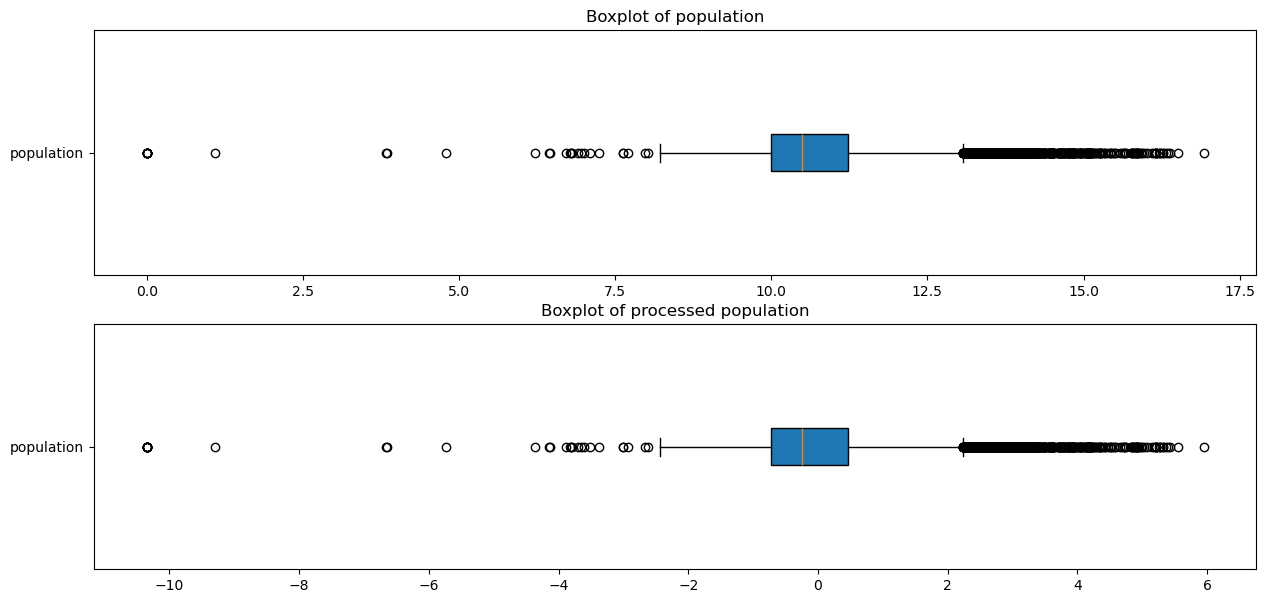

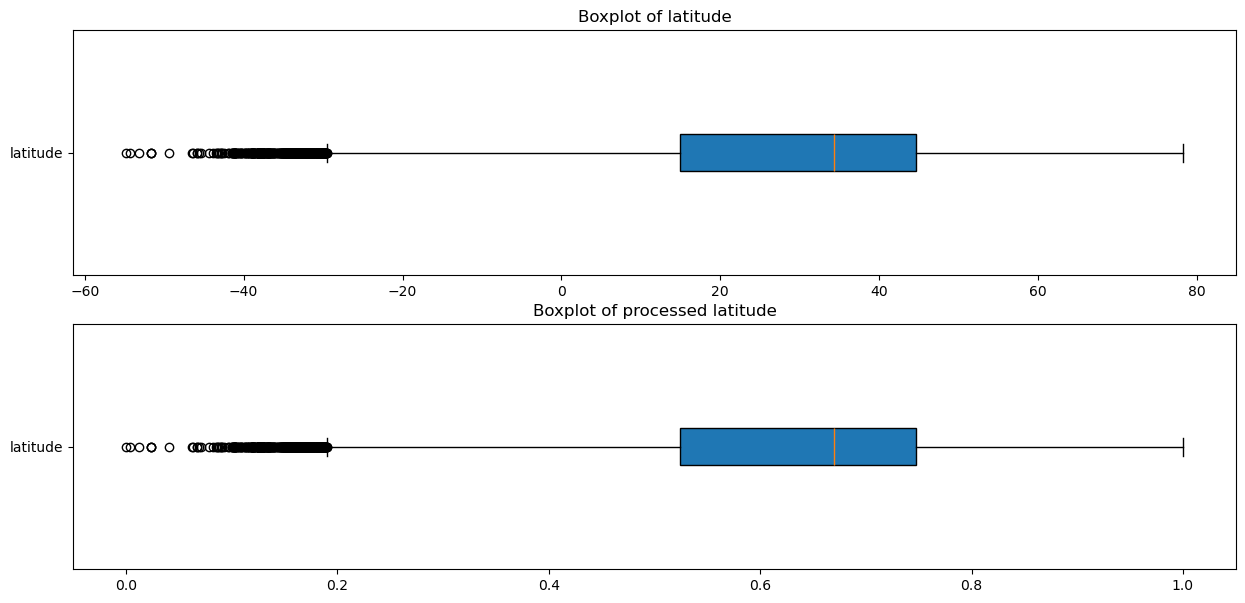

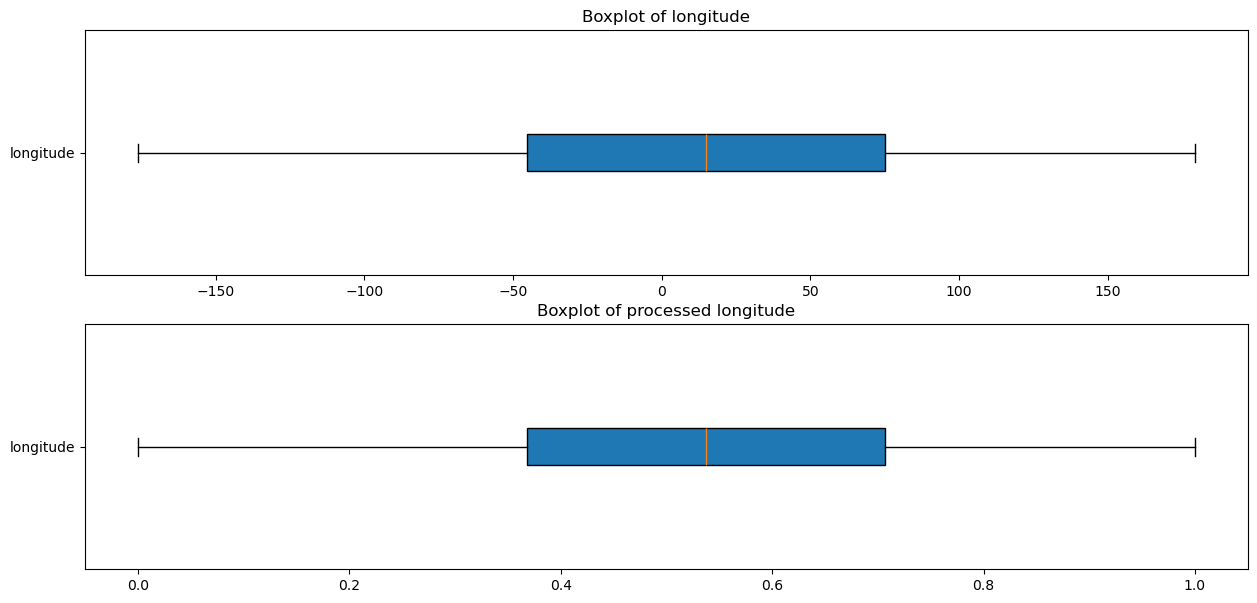

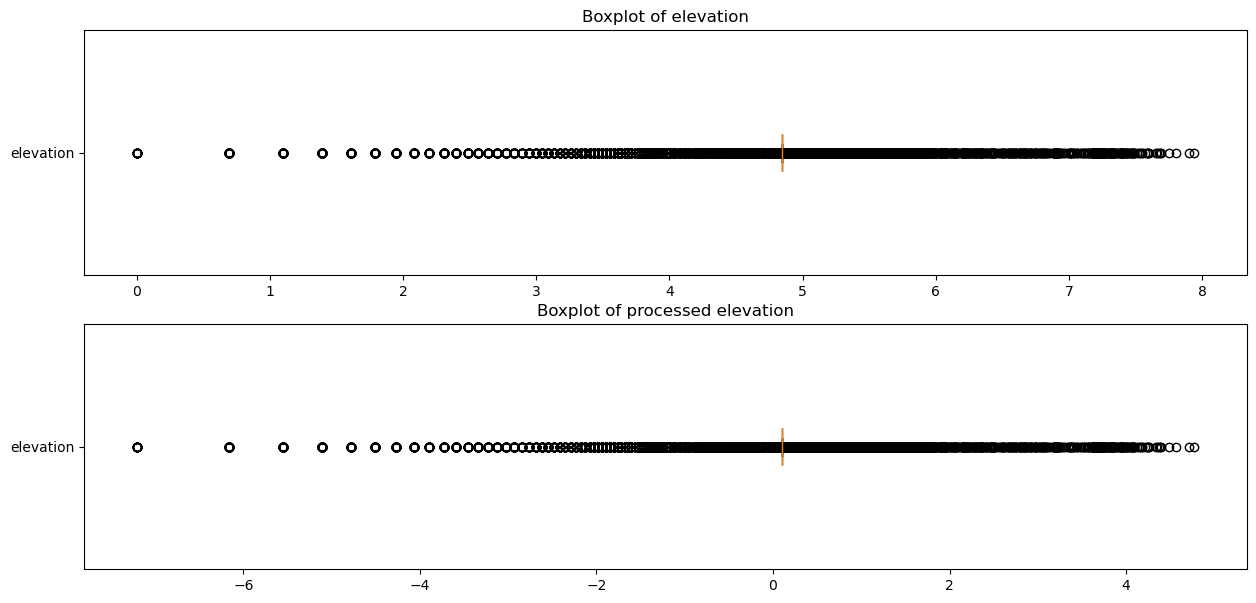

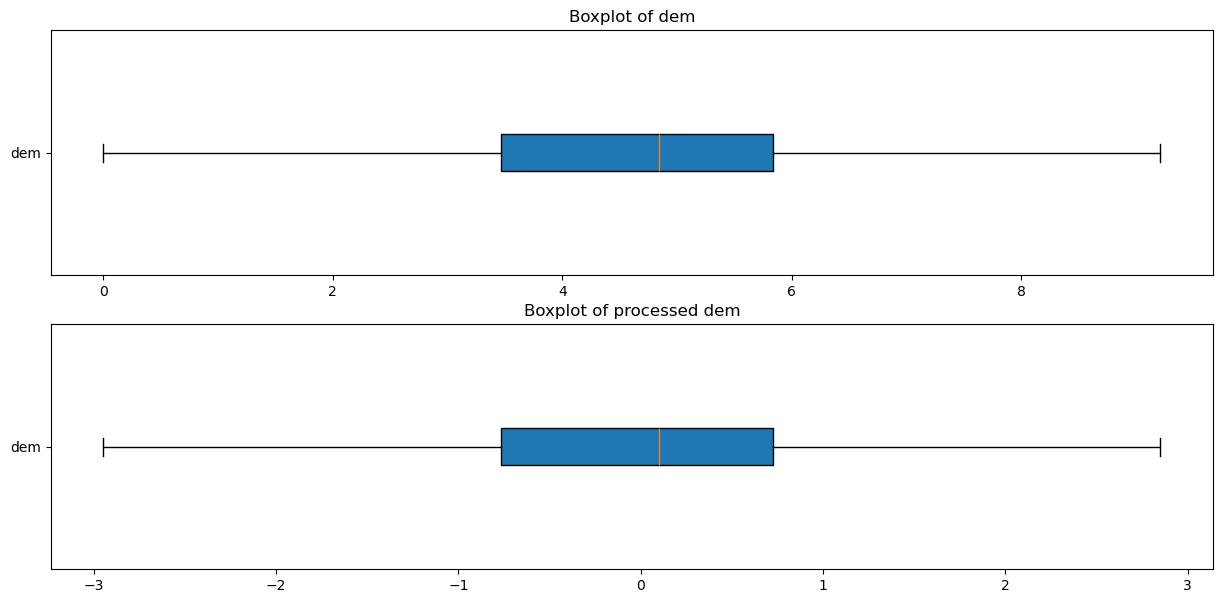

In [98]:
for column in scale_data.keys():
    pre_data = df[column].copy()
    
    df[column] = scale_data[column].fit_transform(df[[column]])
    draw_boxplot(pre_data, df[column], str(column))

## Encoding

### Sợ lượng unique value của các feature string

In [99]:
str_columns = [
    "geonameid",
    "name",
    "asciiname",
    "alternatenames",
    "feature class",
    "feature code",
    "country code",
    "cc2",
    "admin1 code",
    "admin2 code",
    "admin3 code",
    "admin4 code",
    "timezone"
]

In [100]:
for column in str_columns:
    print(f"{column} has {df[column].nunique()} unique values")

geonameid has 23468 unique values
name has 22309 unique values
asciiname has 22247 unique values
alternatenames has 21399 unique values
feature class has 1 unique values
feature code has 16 unique values
country code has 244 unique values
cc2 has 79 unique values
admin1 code has 340 unique values
admin2 code has 4830 unique values
admin3 code has 5028 unique values
admin4 code has 2009 unique values
timezone has 357 unique values


### One-hot encoding cho các features có it unique value

In [101]:
one_hot_feature = [
    "feature code"
]

In [102]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[one_hot_feature])

encoded_df = pd.DataFrame(
        encoded, 
        columns=encoder.get_feature_names_out(one_hot_feature)
    )

df = df.drop(columns=one_hot_feature)
df = pd.concat([df, encoded_df], axis=1)

### Frequency encoding cho các feature có unique values lớn

In [103]:
frequecy_columns = [
    "country code",
    "cc2",
    "admin1 code",
    "admin2 code",
    "admin3 code",
    "admin4 code",
    "timezone"
]

In [104]:
for column in frequecy_columns:
    freq = df[column].value_counts()
    df[column] = df[column].map(freq)

## Feature selection

### Phân tích các feature dạng numeric

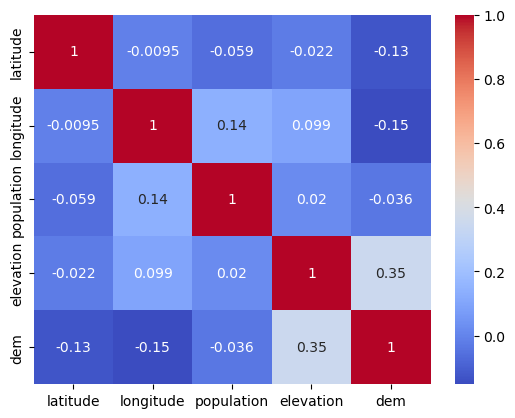

In [105]:
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Có thể thấy các giá trị numeric không liên quan đến nhau nên ta sẽ sử dụng tất cả các giá trị này

### Phân tích các feature dạng string

In [106]:
droped_feature = [
    "geonameid",
    "name",
    "asciiname",
    "alternatenames",
    # Drop các feature này vì chúng là unique
    "feature class",
    # Drop feature này vì nó chỉ mang 1 giá trị là "P"
]

In [107]:
df = df.drop(droped_feature, axis=1)
df.head()

,latitude,longitude,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,...,feature code_PPLC,feature code_PPLF,feature code_PPLG,feature code_PPLH,feature code_PPLL,feature code_PPLQ,feature code_PPLR,feature code_PPLS,feature code_PPLW,feature code_PPLX
0,0.731505,0.499829,2.0,23230.0,630.0,7198.0,16350.0,21243.0,-1.037709,0.100248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.731509,0.499792,2.0,23230.0,907.0,7198.0,16350.0,21243.0,-0.793472,0.100248,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.604140,0.651770,13.0,23230.0,907.0,7198.0,16350.0,21243.0,-0.045776,0.100248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.605830,0.652861,13.0,23230.0,746.0,7198.0,16350.0,21243.0,0.878328,0.100248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.602385,0.653983,13.0,23230.0,572.0,7198.0,16350.0,21243.0,-0.315114,0.100248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
print(df.shape)
print(df.info())

(23469, 29)
<class 'pandas.core.frame.DataFrame'>
Index: 23469 entries, 0 to 20896
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            23468 non-null  float64
 1   longitude           23468 non-null  float64
 2   country code        23468 non-null  float64
 3   cc2                 23468 non-null  float64
 4   admin1 code         23468 non-null  float64
 5   admin2 code         23468 non-null  float64
 6   admin3 code         23468 non-null  float64
 7   admin4 code         23468 non-null  float64
 8   population          23468 non-null  float64
 9   elevation           23468 non-null  float64
 10  dem                 23468 non-null  float64
 11  timezone            23468 non-null  float64
 12  modification date   23468 non-null  object 
 13  feature code_ENG    23468 non-null  float64
 14  feature code_PPL    23468 non-null  float64
 15  feature code_PPLA   23468 non-null  float64
 1